In [257]:
# Dependencies
import tweepy
import time
import json
import random
import requests as req
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [258]:
target_terms = ("@BBC","@CBS","@CNN","@FoxNews", "@nytimes")

results_list = []
avg_sentiments_list = []
counter = 1

# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)
        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)


            # Add sentiments for each tweet into an array
            results_list.append({"User": target, 
                           "Source account": tweet["source"],
                           "Date": tweet["created_at"],        
                           "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": len(compound_list)})
            
            
            # Add to counter 
            counter = counter + 1
            

print(results_list)
print("")

[{'User': '@BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Wed Oct 03 07:04:08 +0000 2018', 'Text': '🐧 A zoo has been forced to fill its new penguin exhibit with models, as a shortage of birds means it is unable to g… https://t.co/BmSAy8zQJP', 'Compound': -0.6124, 'Positive': 0.0, 'Negative': 0.192, 'Neutral': 0.808, 'Tweets Ago': 1}, {'User': '@BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Wed Oct 03 06:08:02 +0000 2018', 'Text': '"Oh, I\'m so sorry," and other things not to say to amputees. \n(via @BBCThree) https://t.co/L8eiOleNyi', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0, 'Tweets Ago': 2}, {'User': '@BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Tue Oct 02 19:02:07 +0000 2018', 'Text': 'Discover the extraordinary story of how a small Scottish bank grew to briefly become the biggest in the wor

In [259]:
news_df = pd.DataFrame(results_list).set_index("User").round(3)
news_df.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago
User,,,,,,,,
@BBC,-0.612,Wed Oct 03 07:04:08 +0000 2018,0.192,0.808,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",🐧 A zoo has been forced to fill its new pengui...,1
@BBC,0.000,Wed Oct 03 06:08:02 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","""Oh, I'm so sorry,"" and other things not to sa...",2
@BBC,0.000,Tue Oct 02 19:02:07 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Discover the extraordinary story of how a smal...,3
@BBC,-0.802,Tue Oct 02 17:55:03 +0000 2018,0.427,0.573,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Knife crime is up 22%. Who are the victims and...,4
@BBC,0.402,Tue Oct 02 17:06:06 +0000 2018,0.000,0.803,0.197,"<a href=""http://www.socialflow.com"" rel=""nofol...",The gender reveal party that sparked a massive...,5


In [260]:
news_df.to_csv("../Week_7/sentiments_analysis.csv", encoding="utf-8", index=False)


In [261]:
compound_df = news_df.reset_index("User")
compound_df

,User,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago
0,@BBC,-0.612,Wed Oct 03 07:04:08 +0000 2018,0.192,0.808,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",🐧 A zoo has been forced to fill its new pengui...,1
1,@BBC,0.000,Wed Oct 03 06:08:02 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","""Oh, I'm so sorry,"" and other things not to sa...",2
2,@BBC,0.000,Tue Oct 02 19:02:07 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Discover the extraordinary story of how a smal...,3
3,@BBC,-0.802,Tue Oct 02 17:55:03 +0000 2018,0.427,0.573,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Knife crime is up 22%. Who are the victims and...,4
4,@BBC,0.402,Tue Oct 02 17:06:06 +0000 2018,0.000,0.803,0.197,"<a href=""http://www.socialflow.com"" rel=""nofol...",The gender reveal party that sparked a massive...,5
5,@BBC,0.557,Tue Oct 02 16:06:02 +0000 2018,0.000,0.816,0.184,"<a href=""http://www.socialflow.com"" rel=""nofol...","In 2002, Iberian Lynx were the rarest cats in ...",6
6,@BBC,-0.273,Tue Oct 02 14:06:04 +0000 2018,0.242,0.554,0.204,"<a href=""http://www.socialflow.com"" rel=""nofol...",Two scientists who discovered how to fight can...,7
7,@BBC,0.599,Tue Oct 02 13:05:03 +0000 2018,0.000,0.795,0.205,"<a href=""http://www.socialflow.com"" rel=""nofol...","🍲😋 A bowl of warm, hearty stew is always a wel...",8
8,@BBC,0.000,Tue Oct 02 12:05:04 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Jodie Whittaker. New Doctor...and a 'Shat Lass...,9
9,@BBC,0.572,Tue Oct 02 10:47:27 +0000 2018,0.000,0.829,0.171,"<a href=""http://www.socialflow.com"" rel=""nofol...",Donna Strickland has become the first woman to...,10


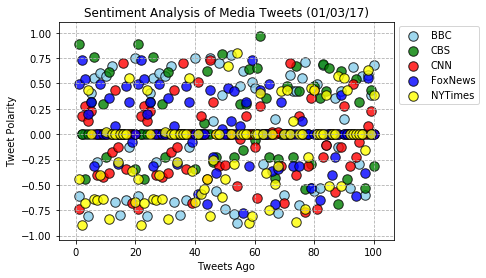

In [262]:
fig, ax = plt.subplots()


BBC = ax.scatter(x=compound_df[compound_df["User"]=="@BBC"]['Tweets Ago'].values,
                y=compound_df[compound_df["User"]=="@BBC"]['Compound'].values,label = "BBC",
                marker="o", color="skyblue", edgecolors="k", 
                 alpha=0.8, s=90 ) 

CBS = ax.scatter(x=compound_df[compound_df["User"]=="@CBS"]['Tweets Ago'].values,
                y=compound_df[compound_df["User"]=="@CBS"]['Compound'].values,label = "CBS",
                marker="o", color="green", edgecolors="k",
                 alpha=0.8,s=90)

CNN = ax.scatter(x=compound_df[compound_df["User"]=="@CNN"]['Tweets Ago'].values,
                y=compound_df[compound_df["User"]=="@CNN"]['Compound'].values,label = "CNN",
                marker="o", color="red", edgecolors="k",
                 alpha=0.8,s=90)

FoxNews = ax.scatter(x=compound_df[compound_df["User"]=="@FoxNews"]['Tweets Ago'].values,
                y=compound_df[compound_df["User"]=="@FoxNews"]['Compound'].values,label = "FoxNews",
                marker="o", color="blue", edgecolors="k",
                 alpha=0.8,s=90)

NYTimes = ax.scatter(x=compound_df[compound_df["User"]=="@nytimes"]['Tweets Ago'].values,
                y=compound_df[compound_df["User"]=="@nytimes"]['Compound'].values,label = "NYTimes",
                marker="o", color="yellow", edgecolors="k",
                 alpha=0.8,s=90)

plt.title("Sentiment Analysis of Media Tweets (01/03/17)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True, linestyle='dashed')
plt.legend(("BBC", "CBS", "CNN", "FoxNews", "NYTimes"),
           loc='lower left',
           bbox_to_anchor=(1, 0.6))
plt.savefig("Sentiment_Analysis_of_Media_Tweets_01_03_17")     
plt.show()

In [263]:
avg_compound = compound_df.groupby("User")["Compound"].mean()
avg_sentiment_df = pd.DataFrame(avg_compound)
avg_sentiment_df = avg_sentiment_df.reset_index("User")
avg_sentiment_df

,User,Compound
0,@BBC,0.03288
1,@CBS,0.09691
2,@CNN,-0.04920
3,@FoxNews,0.03787
4,@nytimes,-0.14794


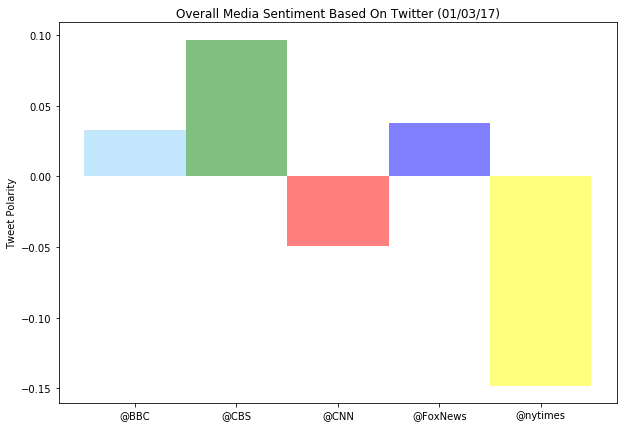

In [264]:
plt.figure(figsize=(10, 7))
colors = ['lightskyblue','green','red','blue', 'yellow']
plt.bar(np.arange(len(avg_sentiment_df)), avg_sentiment_df["Compound"], alpha=0.5, align='center', width=1, color=colors)
plt.xticks(np.arange(len(avg_sentiment_df)), avg_sentiment_df["User"], rotation="horizontal")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter (01/03/17)")
plt.savefig("Overall_Media_Sentiment.png")
plt.show()

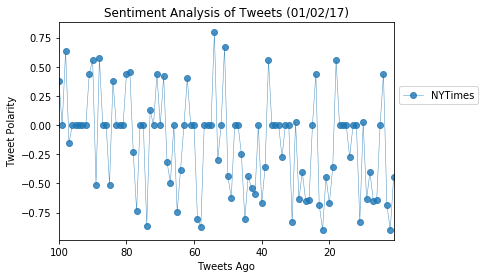

In [265]:
x_vals = compound_df[compound_df["User"]=="@nytimes"]["Tweets Ago"]
y_vals = compound_df[compound_df["User"]=="@nytimes"]["Compound"]
plt.plot(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8, label = "NYTimes")

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets (01/02/17)")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc='lower left',
           bbox_to_anchor=(1, 0.6))
plt.savefig("nytimes.png")
plt.show()